#Strokes Analysis and Prediction

The goal of this notebook is to understand the structure of our dataset, create a prediction model, and improve model accuracy.

The dataset was designed to predict a patient's likelihood of experiencing a stroke by utilizing various health-related factors.

What we will learn while analyzing our dataset:
*   How to read and clean the data
*   Preprocessing our data
*   Using classifcation algorithm to create a prediction model
*   Improving our prediction model





Data retrieved from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

##First look at our dataset

Lets import pandas and numpy and understand what we are working with.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Lets use **info()** and **describe()** to quickly understand the format and the type of data in our dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The **info()** function allow us to quickly analyze the format of our data
*   We can check if there are any null values in the each columns
*   Check the type of data in our dataset

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The describe() function allow us to see specific statistical categorization of our columns.

*   We are able to check statistics such as the mean, standard deviation, the minimum and furthermore.

A quick overview using these function can be helpful when cleaning our data before visualizing or analyzing our data.

Lastly, we can also use **isnull().sum()** to just check how many null values we have in each columns.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are null values in our bmi column. Most of the time we can either drop the rows or fill the missing values with 0, however, there is a better method. A method that can allow us to perserve as much data as possible.

##Filling in NaN values
Lets use a method called impute to fill in our missing values.

In [ ]:
numeric_with_missing = df.select_dtypes(include=np.number) #We will select all numeric type columns
numeric_with_missing

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


Lets look at the means of our columns.

In [ ]:
numeric_with_missing.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

We will be filling our NaN values with the mean value of their specific column.

In [ ]:
numeric = numeric_with_missing.fillna(numeric_with_missing.mean())
numeric

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0
5106,44873,81.0,0,0,125.20,40.000000,0
5107,19723,35.0,0,0,82.99,30.600000,0
5108,37544,51.0,0,0,166.29,25.600000,0


In [ ]:
numeric.info()# check if our null values have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 279.6 KB


As you can see, all our columns no longer have null values and have been filled with the averages of each columns.

**Challenge**: What other solutions can be done for null values?

#Gaussian Naive Bayes Classification



In this notebook, we will be using Naive Bayes Classification as our machin learning algorithm for our classifcation model. We will be using Scikit-Learn to install neccessary tools to build our classifier.

There are 3 types of Naive Bayes algorithm
1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Bernoulli Naive Bayes

Gaussian Naive bayes is the one we will be using for our model today. This algorithm is designed for continuous numeric features. It is a probabilistic classificaiton algorithm that works best when the dataset follow a Gaussian/normal distribution. It is a simple yet efficient classification method.




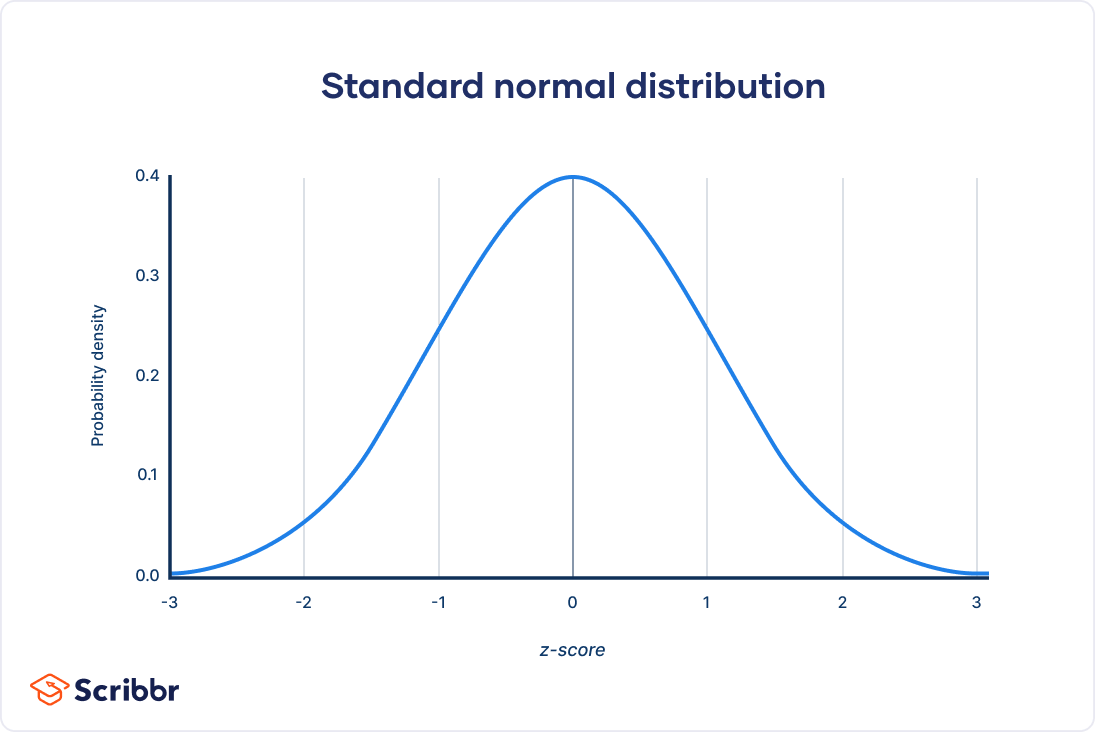

First, lets change our categorical data into binary numeric columns so our classification algorithm can read it. We also don't want to miss any important data in our categorical columns.

In [ ]:
categorical = df.select_dtypes(include=object)
categorical = pd.get_dummies(categorical)
categorical

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
X = numeric.join(categorical)
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


Now we can specify our feature vector and the target column/variable.

In [ ]:
X = X.drop(['stroke'], axis =1) # selecting our variable/column (stroke)
y = df['stroke']

Next we can split our data into training and testing data and begin creating our classification model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

For this classification algorithm, we will be using **GaussianNB** for our Gaussian Naive Bayes classifier.

Moreover, we will be using **StandardScaler** as our columns have different scales such as bmi and age. We have to scale our data before creating our model.

We will incorporate both of these into a **Pipeline** class. Pipeline allows us to specify the preprocessing and the model in one object. This helps enlimiate errors in our preprocessing steps.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

clf = make_pipeline(StandardScaler(), GaussianNB())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Lets take a look at our accuracy score by using **score()**.

In [ ]:
clf.score(X_test, y_test)

0.18395303326810175

The accuracy of our model is 18%, which is very low. Lets take a look at why we are getting this accuracy.

One reason is that our data is biased or imbalanced. Since our target varaible is the strokes column. Lets take a look at its distribution!

0    4861
1     249
Name: stroke, dtype: int64


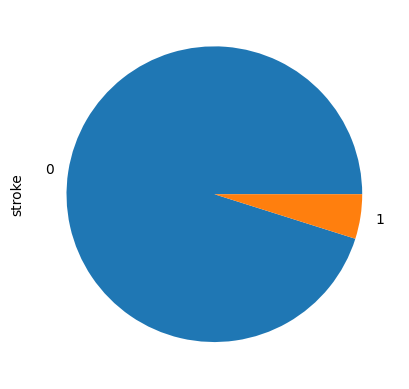

In [ ]:
counts = df['stroke'].value_counts() #counting the number of people that have strokes comapred to people with no strokes in our dataset.
counts.plot.pie()
print(counts)

We might have found our problem right here. As you can see, we have a lot of data on people with out strokes, compared to our samples with strokes. Therefore, our model can be very biased towards predicting people without strokes.

**Challenge**: Can you find any other imbalance or error in our dataset that could cause the inaccuracy of our model?

**Solution**: In categorical columns, there are values such as unknown and others. These values can significantly affect a classification prediction model's performance and behaviour. The values can lead to incorrect prediction and mistreatment of their categories. A solution to this is to correctly identify the grouping of these values.

In addition, lets take a look at our balanced accuracy score. This score takes into account the imbalanced nature of the dataset. It provides a more balanced view of a classifier's effectiveness when classes have different sizes.

In [ ]:
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5582216522775711

##Finding a solution to our imbalanced dataset

There are multiple ways of enhancing our model because of imbalanced dataset, we will be trying a few of these techniques.

Firstly, in our **GaussianNB**, we can use a parameter called **priors**. In an imbalanced dataset, priors allow us to give more weight to the minority class in our classifier.

Furthermore, we will be applying an oversampling technique. **SMOTE** or **Synthetic Minority Over-sampling technique** is a statistical technique that increases the number of cases for it to reach a balanced dataset. The technique works by generating new cases of our existing minority class from our input.

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
smote = SMOTE(random_state=42) #random_state parameter ensure that our synthetic samples are consistent across different runs.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
clf = make_pipeline(GaussianNB(priors=[0.2, 0.8]))# we can adjust these two number(as long they add up to 1) until there is improvement in our model
clf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('gaussiannb', GaussianNB(priors=[0.2, 0.8]))])

Note: taking away StandardScaler also increased our accuracy score

**Challenge**: Find out the function of StandardScaler and why removing it will increase our model accuracy

**Solution**: Algorithm like Gaussian Naive Bayes are not sensitive to the scale feature. Therefore, when using StandardScaler, it might have introduce noise or distortions that affected the model's performance.

Lets check our accuracy and balanced accuracy score once more!

In [ ]:
clf.score(X_test, y_test)

0.604044357469015

In [ ]:
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7355732760177727

The scores have shown great improvement after some adjustment to our model. All in all, we can conclude that our imbalanced dataset might have been the cause of inaccuracy of our model. However, it's essential that we do not solely attribute the entire issue to this one factor, considering that using the Gaussian algorithm might not have been the optimal fit for our dataset.

**Challenge**: try using different Naive Bayes algorithm, or different classifier clagorithm to model this dataset.

